<figure>
  <IMG SRC="input/FAU.png" WIDTH=250 ALIGN="right">
</figure>

# Data visualization in Python 3
    
*David B. Blumenthal*, *Suryadipto Sarkar*



## Statistical graphics with seaborn


Seaborn is an amazing data visualization library for statistical graphics plotting in Python. It provides beautiful default styles and colour palettes to make statistical plots more attractive. It is built on the top of the **matplotlib** library and also closely integrated to the data structures from **pandas**. In this tutorial, we shall see how to use seaborn to make a variety of plots and how we can use it along with matplotlib to make our plots more attractive.

In [1]:
import pandas
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

### Seaborn’s plotting functions
In this section, we shall explore some of the wide variety of options you got when using Seaborn for plotting graphs. There are various kinds of plots that are supported in Seaborn and here we are going to explore a few of them.

### Seaborn vs Matplotlib

Behind the scenes, seaborn uses **matplotlib** to draw its plots. For interactive work, it’s recommended to use a Jupyter/IPython interface in matplotlib mode, or else you’ll have to call **matplotlib.pyplot.show()** when you want to see the plot.

Seaborn’s integration with matplotlib allows you to use it across the many environments that matplotlib supports, inlcuding exploratory analysis in notebooks, real-time interaction in GUI applications, and archival output in a number of raster and vector formats.


While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.

Matplotlib has a comprehensive and powerful API; just about any attribute of the figure can be changed to your liking. A combination of seaborn’s high-level interface and matplotlib’s deep customizability will allow you both to quickly explore your data and to create graphics that can be tailored into a publication quality final product.

## The Matplotlib Object Hierarchy

One important big-picture matplotlib concept is its object hierarchy.

If you’ve worked through any introductory matplotlib tutorial, you’ve probably called something like plt.plot([1, 2, 3]). This one-liner hides the fact that a plot is really a hierarchy of nested Python objects. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).

You can think of the Figure object as a box-like container holding one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels:


[<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png">](hierarchy)


## Anatomy of a figure

[<img src="https://files.realpython.com/media/anatomy.7d033ebbfbc8.png">](anatomy)


## Load Data To Construct Seaborn Plots

In this section, we are going to see how to import **in-built** datasets from seaborn that are automatically downloaded at the time of installation. You can also use **Pandas** to import any dataset but using in-built datasets can come really handy when practising  Seaborn.

In [56]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


#### Lets load "car_crashes" dataset:

In [3]:
df = sns.load_dataset('car_crashes')
print(df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


## Plotting with the relplot function

The Seaborn library provides us with **relplot()** function and this function provides access to several different axes-level functions that show the **relationship between two variables** with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

* scatterplot() (with kind=”scatter”)
* lineplot() (with kind=”line”)

The default value for the parameter kind is ‘scatter’ which means that by default this function would return a scatterplot. Here are a few examples of this function:

In [4]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


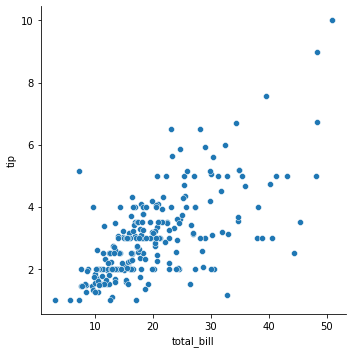

In [5]:
sns.relplot(data=tips, x="total_bill", y="tip")

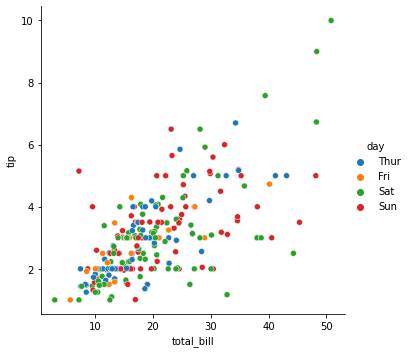

In [6]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")


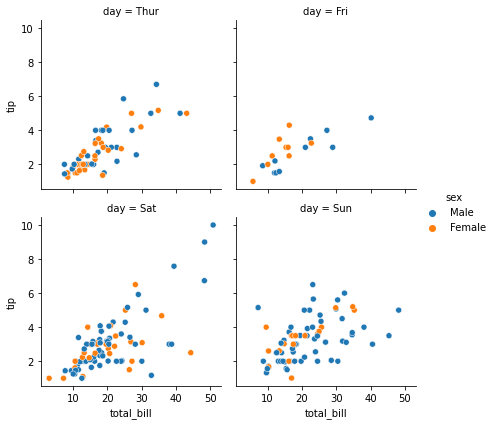

In [7]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="sex", col="day", col_wrap=2, height = 3)


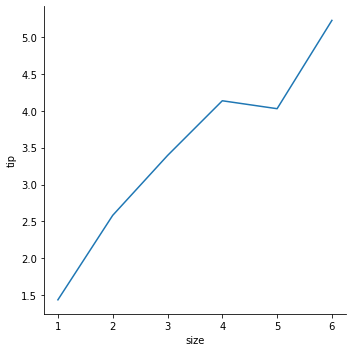

In [8]:
sns.relplot(data=tips, x="size", y="tip",kind="line",ci=None)

---
## <a name="ex1"></a>Exercise 1

Load the dataset named **diamonds**. Make a relplot that shows the relationship between price and carat. Separate the results by a quality of a cut. 

<a href="#ex1sol">Solution for Exercise 1</a>

---
## Histogram

Histograms represent the data distribution by forming bins along with the range of the data and then drawing bars to show the number of observations that fall in each bin.In Seaborn we use **displot()** function to plot histograms.

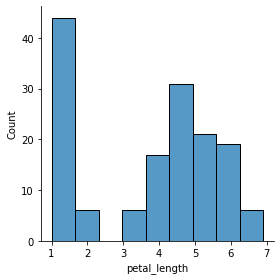

In [10]:
df = sns.load_dataset('iris')
sns.displot(df['petal_length'],kde = False,height = 4)


## Bar Plot

Seaborn supports many types of bar plots and you will see a few of them here. Here, as mentioned in the introduction we will use both seaborn and matplotlib together to demonstrate several plots.




### Example **vertical barplot**
The barplot plot below shows the survivors of the titanic crash based on category.

<AxesSubplot:xlabel='embark_town', ylabel='age'>

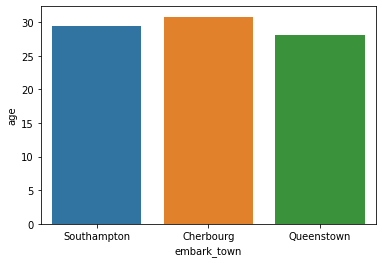

In [11]:
# load dataset
titanic = sns.load_dataset('titanic')
# create plot
sns.barplot(x = 'embark_town', y = 'age', data = titanic,ci=None)


Seaborn allows to perform various customizations to plots to make them look exactly as you need/like. Compare this default setting:

<AxesSubplot:xlabel='sex', ylabel='survived'>

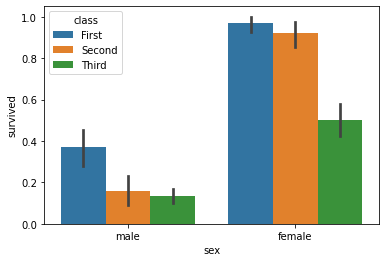

In [12]:
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic,
            )

To this one:

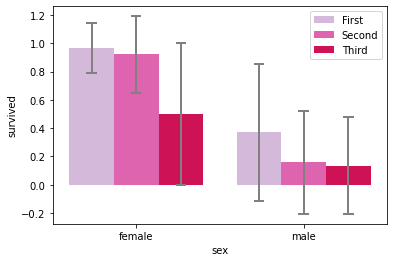

In [13]:
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic,
            palette = 'PuRd',
            order = ['female', 'male'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'  
            )
plt.legend()
plt.show()

### Horizontal barplot
To draw a horizontal plot pass ‘h’ to the parameter, orient of the barplot function as shown below:

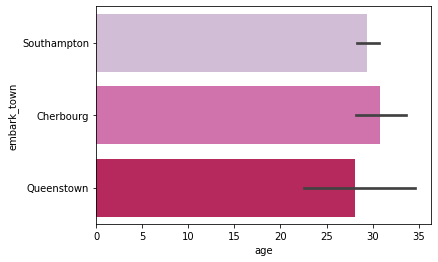

In [14]:
sns.barplot(x = 'age', y = 'embark_town', data = titanic,
            palette = 'PuRd', orient = 'h',
            )
plt.show()

### Count plot
The count plot can be thought of as a histogram across a categorical variable.The example below demonstrates the count plot

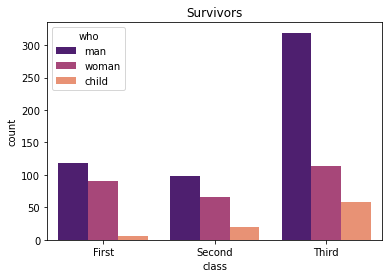

In [15]:
sns.countplot(x = 'class', hue = 'who', data = titanic, palette = 'magma')
plt.title('Survivors')
plt.show()

### Point Plot

Point plot is used to show point estimates and confidence intervals using scatter plot glyphs. A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. Here are a few examples of point plots:

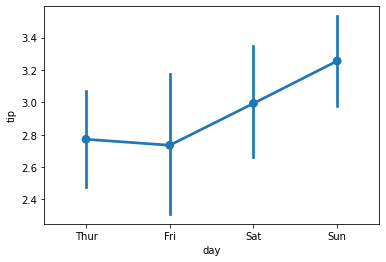

In [16]:
data = sns.load_dataset("tips") 
sns.pointplot(x="day", y="tip", data=data)
plt.show()

<AxesSubplot:xlabel='time', ylabel='total_bill'>

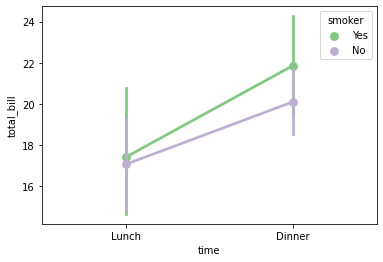

In [17]:
sns.pointplot(x="time", y="total_bill", hue="smoker",
                   data=data, palette="Accent")

### Joint Plot
Joint Plot draws a plot of two variables with bivariate and univariate graphs. It uses the Scatter Plot and Histogram. Joint Plot can also display data using Kernel Density Estimate (KDE) and Hexagons. We can also draw a Regression Line in Scatter Plot. Here are few of the examples of a joint plot

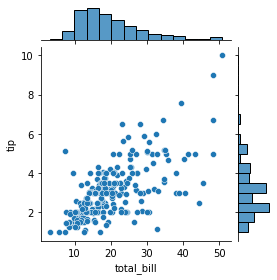

In [18]:
tips=sns.load_dataset('tips')
sns.jointplot(x='total_bill', y='tip',data=tips, height = 4)

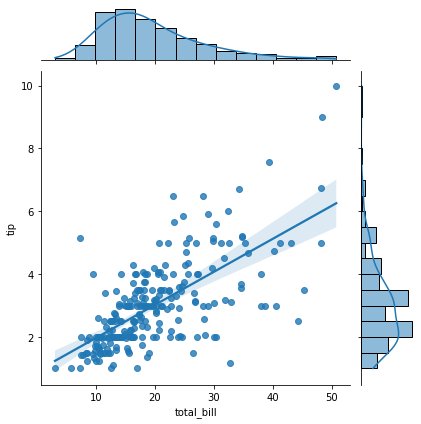

In [19]:
# Add regression line to scatter plot and kernel density estimate to histogram
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg') 

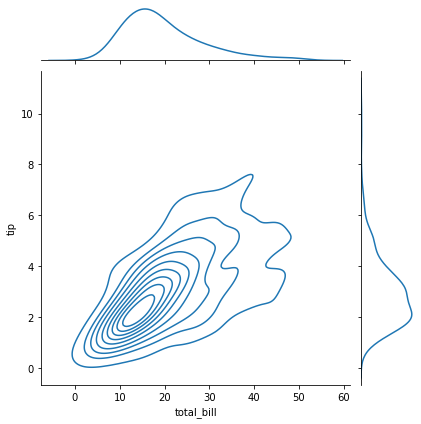

In [20]:

# Display kernel density estimate instead of scatter plot and histogram
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')


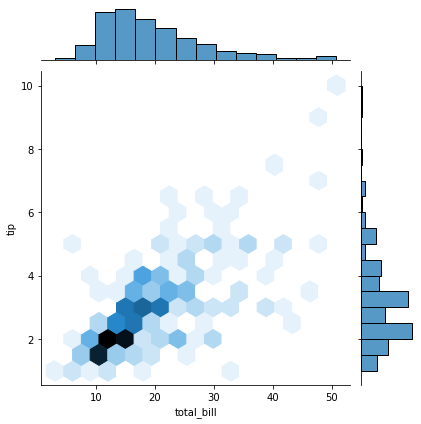

In [21]:
# Display hexagons instead of points in scatter plot
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') 

### Regplot
Regplot is one of the functions in Seaborn that are used to visualize the linear relationship as determined through regression. Also, you‘ll see a slightly shaded portion around the regression line which indicates how much the pints are scattered around a certain area. Here are few of the examples

Now we will plot a discrete x variable and add some jitter. Here you can see that the areas where points are more densely populated have less shaded portion around the regression line and shaded portion is more spread where the points are more scattered.

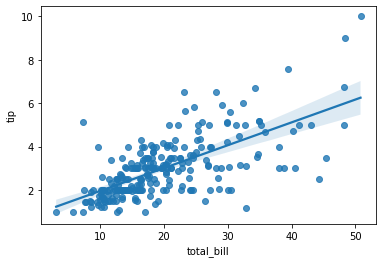

In [22]:
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='size', ylabel='total_bill'>

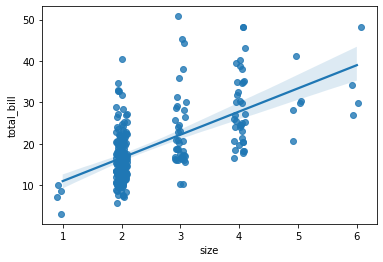

In [23]:
sns.regplot(x="size", y="total_bill", data=tips, x_jitter=0.1)

### Lm Plot
In Seaborn, we can also use lmplot instead of regplot to visualise a regression between two variables as we saw in our last example. But what is the difference between the two plots?

The regplot function performs a simple linear regression model fit and plot whereas the lmplot function combines regplot and FacetGrid.

The FacetGrid class helps in visualizing the distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

It is further important to note that lmplot() is more computationally intensive and is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

Here is a simple example of lmplot where it seems to work just like regplot.

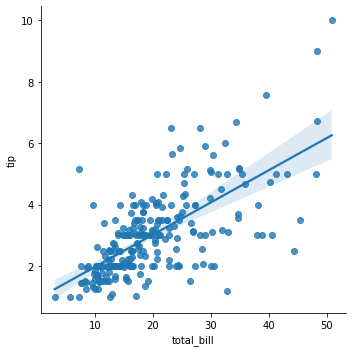

In [24]:
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", data=tips)

Here is how we can use the advance features of lmplot() and use it with multi-plot grid for plotting conditional relationships.

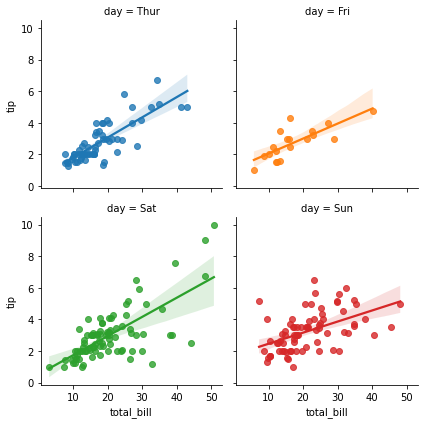

In [25]:
sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
               data=tips, col_wrap=2, height=3)

---
## <a name="ex2"></a>Exercise 2

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. 
Load "anscombe" dataset then slice it by parameter "dataset" and find an appropreate fit for dataset I, II and III.
#### HINTS
utilize `order` parameter to estimate polynomial regression and `robust` to de-weight outliers.

<a href="#ex2sol">Solution for Exercise 2</a>

### KDE plot
KDE plot is a Kernel Density Estimate that is used for visualizing the Probability Density of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether. Here are few of the examples

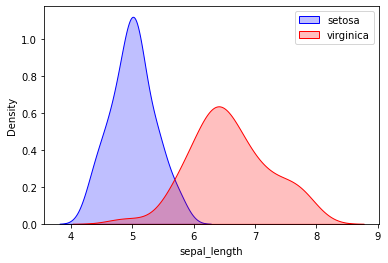

In [29]:
iris = sns.load_dataset("iris")
# Plotting the KDE Plot 
sns.kdeplot(iris.loc[(iris['species']=='setosa'), 
            'sepal_length'], color='b', shade=True, label='setosa') 
sns.kdeplot(iris.loc[(iris['species']=='virginica'), 
            'sepal_length'], color='r', shade=True, label='virginica')
plt.legend()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

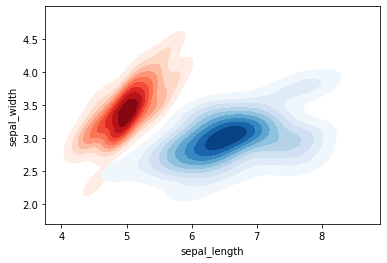

In [30]:
# Setting up the samples 
iris_setosa = iris.query("species=='setosa'") 
iris_virginica = iris.query("species=='virginica'") 
   
# Plotting the KDE Plot 
sns.kdeplot(x = iris_setosa['sepal_length'],  
            y = iris_setosa['sepal_width'], 
            color='r', shade=True, label='Iris_Setosa', 
            cmap="Reds", thresh=0.05) 
# Plotting the KDE Plot 
sns.kdeplot(x = iris_virginica['sepal_length'],  
            y = iris_virginica['sepal_width'], 
            color='r', shade=True, label='iris_virginica', 
            cmap="Blues", thresh=0.05) 


### Box Plot
The box plot, also called the box and whisker diagram is used for depicting groups of numerical data through the quartiles. It is known as the box and whisker diagram because it is composed of a box and whiskers. Boxplot is also used for detecting the outlier in a data set.

A box plot is composed of a summary of 5 different data points: the minimum, first quartile, median, third quartile, and maximum.
 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

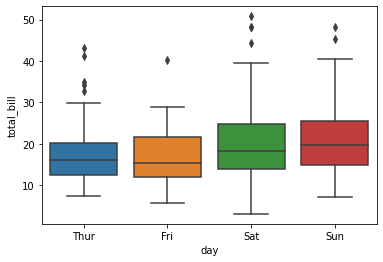

In [31]:
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips)

* The bottom black horizontal line of the box plot is the minimum value
* The first black horizontal line of the rectangle shape of the box plot is the first quartile
 or 25%
* The second black horizontal line of the rectangle shape of the box plot is Second quartile or 50% or median.
* The third black horizontal line of rectangle shape of the same box plot is third quartile or 75%
* The top black horizontal line of the rectangle shape of the box plot is the maximum value.
* The small diamond shape of the box plot is outlier data.

### Violin Plot
Violin plots also like boxplots summarize numeric data over a set of categories. They are essentially a box plot with a kernel density estimate (KDE) overlaid along with the range of the box and reflected to make it look nice. Unlike a box plot, in which all of the plot components correspond to actual data points, the violin plot features a kernel density estimation of the underlying distribution. Here are a few examples of violin plot:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

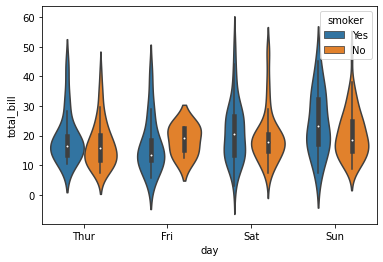

In [32]:
sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips)

Now we can also represent the above plot like this by setting the parameter split as True:


<AxesSubplot:xlabel='day', ylabel='total_bill'>

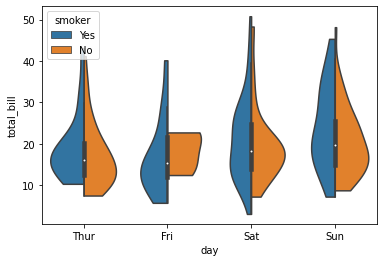

In [33]:
sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, split=True,cut=0)

---
## <a name="ex3"></a>Exercise 3

Please execute the code bellow to create a new dataframe that has shop's visit time and days of visits.
1. Make a simple boxplot where x is a day of week and y is visit time
2. Make a violin plot with the same setting
3. Which one is more informative? Why?

In [36]:
import numpy as np
import pandas as pd
mon = list(np.random.normal(9,1,20)) + list(np.random.normal(18,1,20))
tue = list(np.random.normal(8,1,20)) + list(np.random.normal(19,2,20))
wed = list(np.random.normal(18,2,40))
restaurant = pd.DataFrame([mon+tue+wed,["Monday"]*len(mon)+["Tuesday"]*len(tue)+["Wednesday"]*len(wed)])
restaurant = restaurant.T
restaurant.columns = ["visit_time", "day"]
restaurant["visit_time"] = restaurant["visit_time"].astype('float')
restaurant.head()

,visit_time,day
0,9.713466,Monday
1,8.775000,Monday
2,10.005603,Monday
3,9.324582,Monday
4,9.799591,Monday


<a href="#ex3sol">Solution for Exercise 3</a>

## Heatmap

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours. In Seaborn, we can make annotated heatmaps which can be tweaked using Matplotlib as per requirement.

Now if we get the data of the dataset ‘flights’ and transform it by monthly as shown below, it can give us a lot of information about the data. But this information is in tabular form and can be better displayed by using heatmap as shown below:

In [39]:
flights=sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

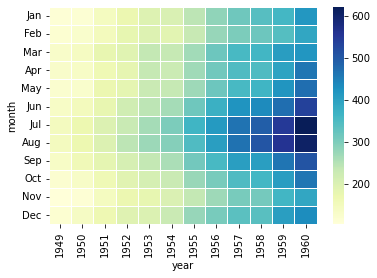

In [40]:
sns.heatmap(flights,linewidths=.5,cmap="YlGnBu")

Now we can also put the respective values in the boxes using the annot parameter of this function

<AxesSubplot:>

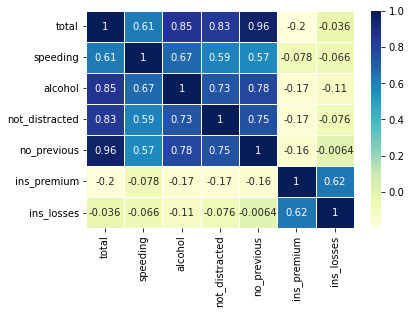

In [41]:
car_crashes = sns.load_dataset("car_crashes")
corr=car_crashes.corr()
sns.heatmap(corr,annot=True,linewidths=.5,cmap="YlGnBu")

### Cluster map
Cluster map method plots a matrix dataset as a hierarchically-clustered heatmap. It uses hierarchical clusters to order data by similarity. This reorganizes the data for the rows and columns and displays similar content next to one another for even more depth of understanding the data.


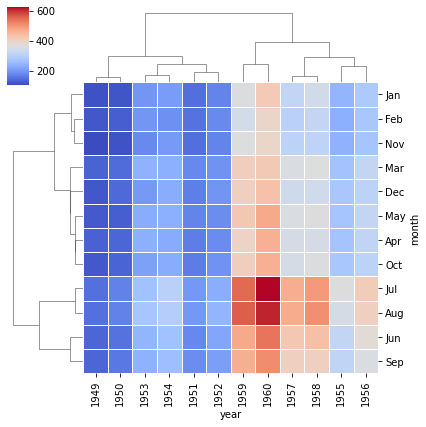

In [42]:
flights=sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
sns.clustermap(flights,linewidths=.5,cmap="coolwarm", figsize=(6, 6))

As you can see in this map all the columns and rows that have similar data together and now neither the years nor the months are in order as we saw in the heatmap. We can modify it a bit and only cluster rows or columns, here is how :

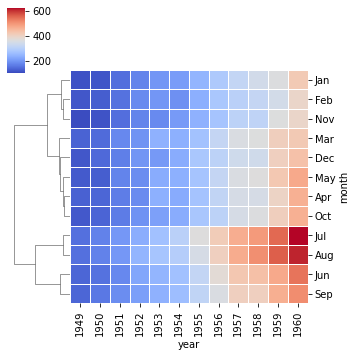

In [43]:
flights=sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
sns.clustermap(flights,linewidths=.5,cmap="coolwarm",col_cluster=False, figsize=(5, 5))

Now all the years are in order but the months are clustered and thus are not in order


### Facetgrid
Facet grid forms a matrix of panels defined by row and column by dividing the variables. Due to panels, a single plot looks like multiple plots. It is very helpful to analyze all combinations in two discrete variables.

The advantage of using Facet is, we can input another variable into the plot. The above plot is divided into two plots based on a third variable called ‘time’ using the ‘col’ parameter. We can also one more parameter “row” which can help to add one more variable to our plot. Now the plot below shows that relation between tips and total bill and also show their relation with two more variables,i.e gender and time.

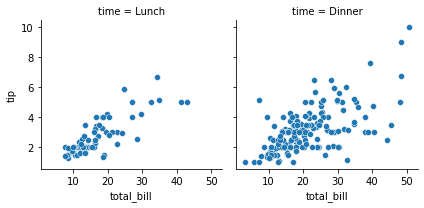

In [44]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")
g.map(sns.scatterplot, "total_bill", "tip")

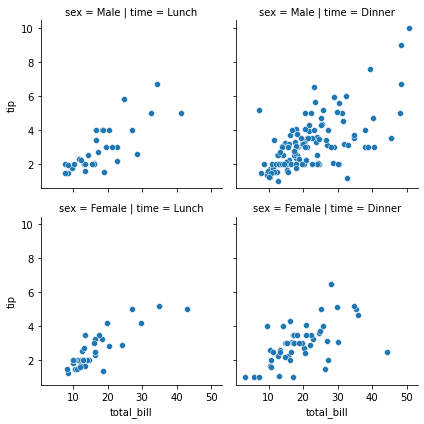

In [45]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

### Pair Plot
Pair plot creates a grid of Axes such that each numeric variable in data will be shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

Pair Plots are a really simple way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data as you’ll see in the example below.

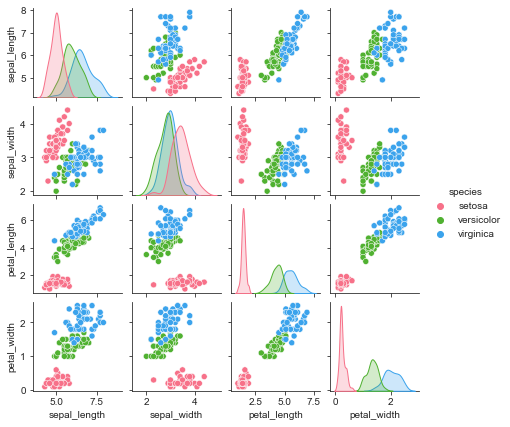

In [46]:
df = sns.load_dataset('iris')
sns.set_style("ticks")
sns.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl",height=1.5)
plt.show()

---
## Styling and Themes in Seaborn

We use visualizations to get insights from a huge amount of data or present our insights to the stakeholders and making these visualizations more pleasing can surely help with both of these. People are more likely to concentrate on beautiful and attractive visualizations rather than dull plots thus styling can be considered as a vital component of data visualization.

Matplotlib library is highly customizable, but it may be hard for us to tweak the right setting to get an attractive and good looking plot. Unlike Matplotlib, Seaborn comes packed with customized themes and a high-level interface for customizing and controlling the look of Matplotlib figures.

First, let us see how we can style a simple Matplotlib plot using Seaborn’s set() function. Here are a few of the popular themes:

* darkgrid
* whitegrid
* dark
* white
* ticks

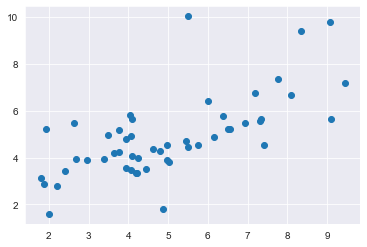

In [47]:
df = sns.load_dataset("car_crashes")
sns.set_style("darkgrid")
plt.scatter(df.speeding,df.alcohol)
plt.show()

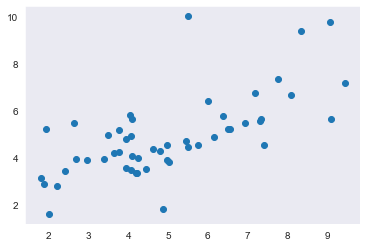

In [48]:
sns.set_style("dark")
plt.scatter(df.speeding,df.alcohol)
plt.show()

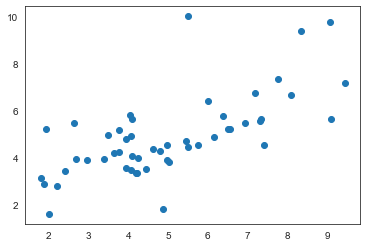

In [43]:
sns.set_style("white")
plt.scatter(df.speeding,df.alcohol)
plt.show()

 We can remove the top and right axis spines using the despine() function.

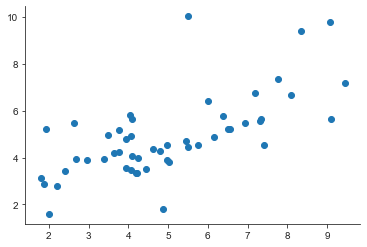

In [44]:
sns.set_style("ticks")
plt.scatter(df.speeding,df.alcohol)
sns.despine()
plt.show()

Seaborn also allows us to control individual elements of our graphs and thus we can control the scale of these elements or the plot by using the set_context() function. We have four preset templates for contexts, based on relative size, the contexts are named as follows

* Paper
* Notebook
* Talk
* Poster

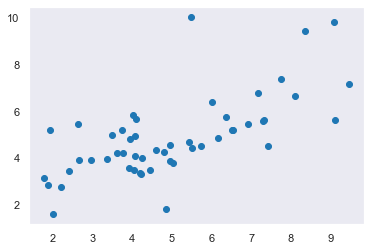

In [49]:
sns.set_style("dark")
sns.set_context("notebook")
plt.scatter(df.speeding,df.alcohol)
plt.show()

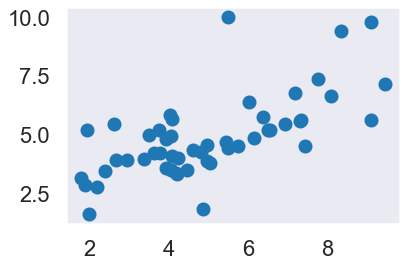

In [50]:
sns.set_style("dark")
sns.set_context("poster")
plt.scatter(df.speeding,df.alcohol)
plt.show()


### Seaborn Color Palette

Seaborn has a reputation for making plots and graphs more attractive using attractive colors and color combinations. In data visualization, color is necessarily involved, and colors have an influence on their observer.Color plays an important role than any other aspect in the visualizations. When used effectively, color adds more value to the plot. A palette means a flat surface on which a painter arranges and mixes paints. Here I’ll show some of the color palettes out of the 170 palettes offered by Seaborn.

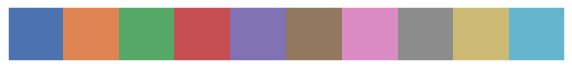

In [51]:
sns.palplot(sns.color_palette("deep", 10))

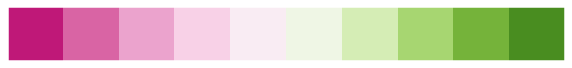

In [52]:
sns.palplot(sns.color_palette("PiYG", 10))

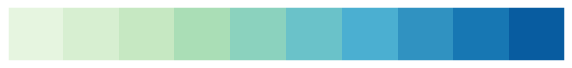

In [53]:
sns.palplot(sns.color_palette("GnBu", 10))

Here is an example of palette usage:

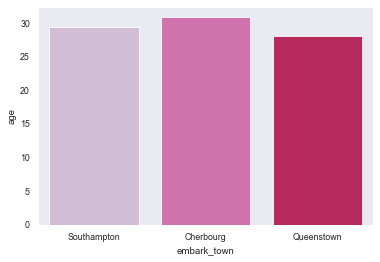

In [54]:
titanic = sns.load_dataset('titanic')
# create plot
sns.set_context("paper")

sns.barplot(x = 'embark_town', y = 'age', data = titanic,
            palette = 'PuRd',ci=None 
            )
plt.show()

### Saving figures

To save a figure you need to create a variable with this plot, then extract the figure with `plot.get_figure("output.png")` and then use `figure.savefig()` function. 
Example:
`

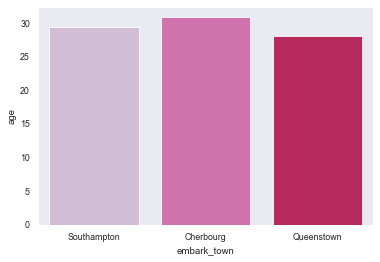

In [55]:
p = sns.barplot(x = 'embark_town', y = 'age', data = titanic,
            palette = 'PuRd',ci=None 
            )
fig = p.get_figure()

fig.savefig("output/figure.png")
plt.show()

---
## <a name="ex4"></a>Exercise 4
Create a heatmap of flights happened between 1955 and 1960 (including both ends, use numpy/pandas for this). Use paper context and any palette that we did not use before. 
Save the plot as in the output folder as "flights.pdf"

<a href="#ex4sol">Solution for Exercise 4</a>

---
## Solutions for exercises

<a name="ex1sol">Solution for Exercise 1</a>

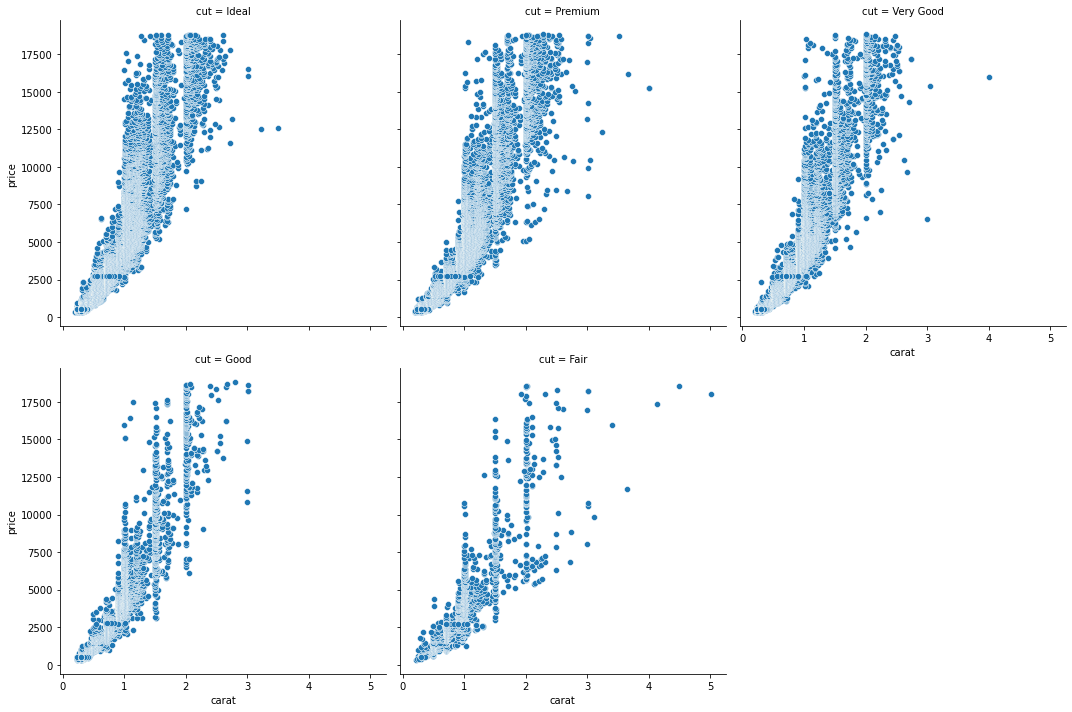

In [9]:
diamonds = sns.load_dataset("diamonds")
sns.relplot(data=diamonds, x="carat", y="price", col="cut", col_wrap=3)

<a href="#ex1">Back to Exercise 1</a>



<a name="ex2sol">Solution for Exercise 2</a>

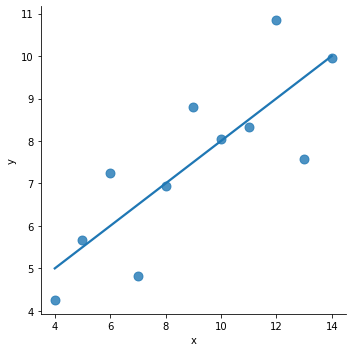

In [26]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe[anscombe.dataset == "I"],
           ci=None, scatter_kws={"s": 80})

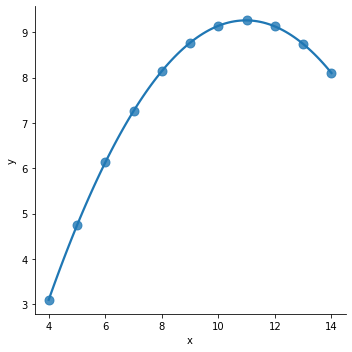

In [27]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

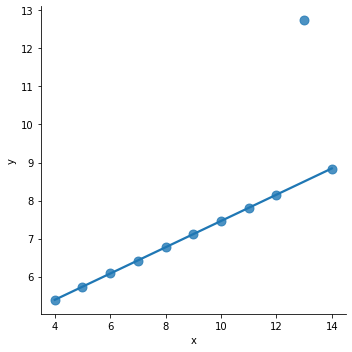

In [28]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

<a href="#ex2">Back to Exercise 2</a>



<a name="ex3sol">Solution for Exercise 3</a>

<AxesSubplot:xlabel='day', ylabel='visit_time'>

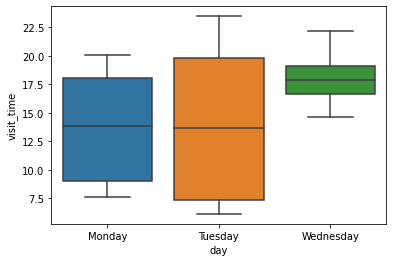

In [37]:
sns.boxplot(x="day", y="visit_time",
                    data=restaurant)

<AxesSubplot:xlabel='day', ylabel='visit_time'>

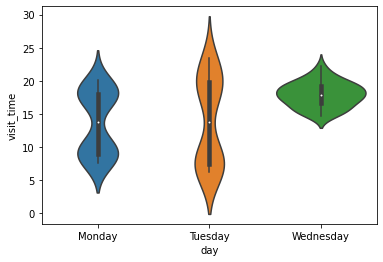

In [38]:
sns.violinplot(x="day", y="visit_time",
                    data=restaurant)

Violin plot is more informative as it shows bimodal nature of the data and allows us to conclude that on Mondays and Tuesdays the restaurant is mostly occupated in the morning and in the evening

<a href="#ex3">Back to Exercise 3</a>



<a name="ex4sol">Solution for Exercise 4</a>

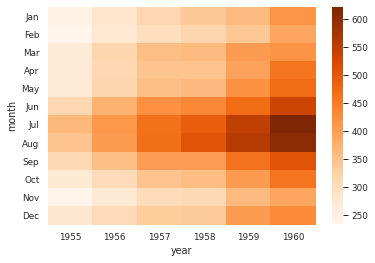

In [ ]:
sns.set_context("paper")

p = sns.heatmap(flights[np.arange(1955,1961)],cmap = "Oranges" )
fig = p.get_figure()

fig.savefig("output/flights.pdf")

<a href="#ex4">Back to Exercise 4</a>
